In [12]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

end_date = datetime.now()
start_date = end_date - timedelta(days=50) 
ticker = 'GOOGL'
data = yf.download(ticker, start=start_date, end=end_date)
ts_data = data['Adj Close']

model = ARIMA(ts_data, order=(5, 1, 0)) 
model_fit = model.fit()

forecast = model_fit.forecast(steps=5) 
forecast_dates = pd.date_range(start=ts_data.index[-1], periods=6, freq='B')[1:]

result = {
    'labels': ts_data.index.strftime('%Y-%m-%d').tolist() + forecast_dates.strftime('%Y-%m-%d').tolist(),
    'actual': ts_data.tolist(),
    'forecast': list(ts_data[-1:]) + forecast.tolist() 
}

print(result)


[*********************100%%**********************]  1 of 1 completed

{'labels': ['2024-05-08', '2024-05-09', '2024-05-10', '2024-05-13', '2024-05-14', '2024-05-15', '2024-05-16', '2024-05-17', '2024-05-20', '2024-05-21', '2024-05-22', '2024-05-23', '2024-05-24', '2024-05-28', '2024-05-29', '2024-05-30', '2024-05-31', '2024-06-03', '2024-06-04', '2024-06-05', '2024-06-06', '2024-06-07', '2024-06-10', '2024-06-11', '2024-06-12', '2024-06-13', '2024-06-14', '2024-06-17', '2024-06-18', '2024-06-20', '2024-06-21', '2024-06-24', '2024-06-25', '2024-06-26', '2024-06-27', '2024-06-28', '2024-07-01', '2024-07-02', '2024-07-03'], 'actual': [169.1858367919922, 169.76516723632812, 168.4566650390625, 168.94610595703125, 170.1447296142578, 172.31224060058594, 173.98031616210938, 175.85816955566406, 176.71717834472656, 177.6461181640625, 176.1778106689453, 173.35104370117188, 174.78939819335938, 176.19776916503906, 175.69834899902344, 171.91270446777344, 172.30224609375, 172.9714813232422, 173.59075927734375, 175.20892333984375, 176.5273895263672, 174.260009765625, 17


/home/hilla/code/10Academy-training/week9/Backtesting-Infrastructure-CryptoTrading/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hilla/code/10Academy-training/week9/Backtesting-Infrastructure-CryptoTrading/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hilla/code/10Academy-training/week9/Backtesting-Infrastructure-CryptoTrading/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hilla/code/1

In [13]:
print(result["forecast"])

[183.8800048828125, 183.16228570069606, 182.8190705431241, 183.02546337362548, 182.15372586968746, 182.08570327320626]


0

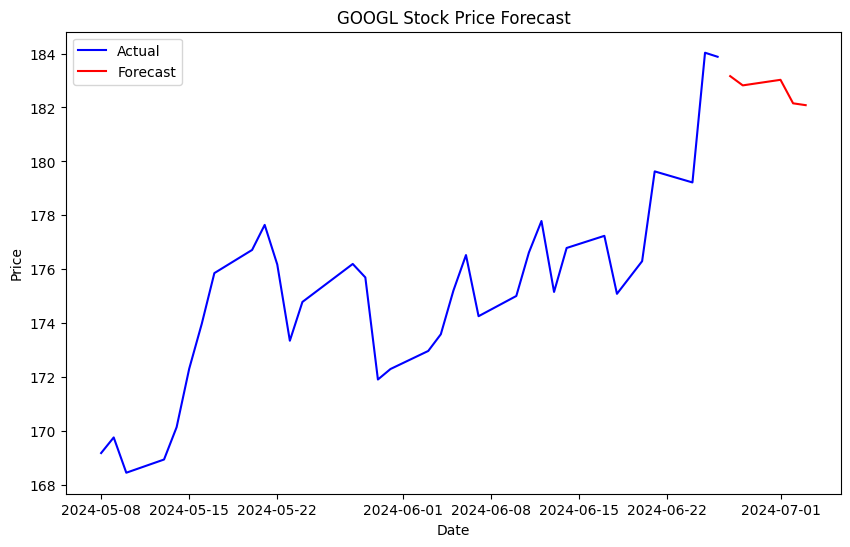

In [14]:
import matplotlib.pyplot as plt
import io

plt.figure(figsize=(10, 6))
plt.plot(ts_data.index, ts_data, label='Actual', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{ticker} Stock Price Forecast')
plt.legend()

# Save plot to buffer
img_buffer = io.BytesIO()
plt.savefig(img_buffer, format='png')
img_buffer.seek(0)

# return send_file(img_buffer, mimetype='image/png')